In [24]:
import json
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open("stored_variables/politics_author_history.json", "r") as f:
    politics_author_history = json.load(f)

In [3]:
print(len(list(politics_author_history.values())[0]))

15149


In [4]:
sorted(list(politics_author_history.values())[0], key = lambda x : x[1])

[['reddit.com', 1135471163],
 ['reddit.com', 1136262610],
 ['reddit.com', 1136992548],
 ['reddit.com', 1139503715],
 ['reddit.com', 1139547140],
 ['reddit.com', 1142234596],
 ['reddit.com', 1142276688],
 ['reddit.com', 1142369982],
 ['reddit.com', 1142587416],
 ['reddit.com', 1142587685],
 ['reddit.com', 1142736120],
 ['reddit.com', 1142747591],
 ['reddit.com', 1143159452],
 ['reddit.com', 1143160487],
 ['reddit.com', 1143179440],
 ['reddit.com', 1143663272],
 ['reddit.com', 1143663404],
 ['reddit.com', 1143832504],
 ['reddit.com', 1143833556],
 ['reddit.com', 1143942942],
 ['reddit.com', 1143943213],
 ['reddit.com', 1143998717],
 ['reddit.com', 1144213581],
 ['reddit.com', 1144266218],
 ['reddit.com', 1144606226],
 ['reddit.com', 1144606450],
 ['reddit.com', 1144695028],
 ['reddit.com', 1144695104],
 ['reddit.com', 1144714992],
 ['reddit.com', 1144737824],
 ['reddit.com', 1144783524],
 ['reddit.com', 1144884930],
 ['reddit.com', 1145152082],
 ['reddit.com', 1145239465],
 ['reddit.com'

In [5]:
list(politics_author_history.keys())[:5]

['Psy-Kosh', 'Qwirk', 'Archer007', 'trivial', 'apodo']

In [6]:
input_subreddit_list = []
author_names = []

for k in politics_author_history.keys():
    input_subreddit_list.append(sorted(politics_author_history[k], key = lambda x : x[1]))
    author_names.append(k)

In [7]:
input_subreddit_list = [[x[0] for x in l] for l in input_subreddit_list]

(array([1.798e+03, 1.300e+02, 3.500e+01, 2.000e+01, 5.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000e+00, 3.94510e+03, 7.88920e+03, 1.18333e+04, 1.57774e+04,
        1.97215e+04, 2.36656e+04, 2.76097e+04, 3.15538e+04, 3.54979e+04,
        3.94420e+04]),
 <a list of 10 Patch objects>)

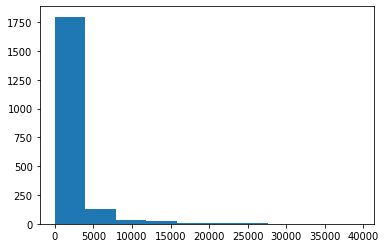

In [8]:
history_lengths = [len(l) for l in input_subreddit_list]

plt.hist(history_lengths)

(array([995., 325., 155., 118.,  67.,  53.,  50.,  37.,  27.,  17.]),
 array([1.0000e+00, 5.0020e+02, 9.9940e+02, 1.4986e+03, 1.9978e+03,
        2.4970e+03, 2.9962e+03, 3.4954e+03, 3.9946e+03, 4.4938e+03,
        4.9930e+03]),
 <a list of 10 Patch objects>)

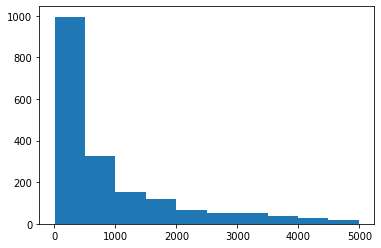

In [9]:
plt.hist([i for i in history_lengths if i < 5000])

(array([417., 230., 141., 111.,  96.,  91.,  79.,  64.,  49.,  42.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <a list of 10 Patch objects>)

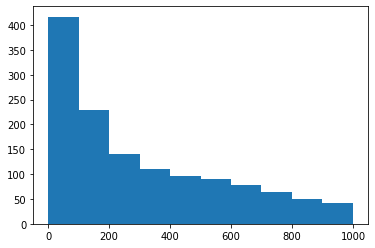

In [10]:
plt.hist([i for i in history_lengths if i < 1000])

In [11]:
print("Mean history length:", np.mean(history_lengths))
print("Standard deviation of history lengths:", np.std(history_lengths))

Mean history length: 1569.1905
Standard deviation of history lengths: 3137.4876406465332


## Create Doc2Vec embeddings of the subreddits

In [12]:
subreddit_docs = [TaggedDocument(input_subreddit_list[i], [author_names[i]]) for i in range(len(input_subreddit_list))]
subreddit_model = Doc2Vec(subreddit_docs, vector_size=50, window=10, min_count=5)

In [13]:
subreddit_docs[0]

TaggedDocument(words=['reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'programming', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com', 'reddit.com

In [14]:
subreddit_model.docvecs['Psy-Kosh']

array([ 4.6823997 ,  2.5649064 , -5.2234244 ,  0.35491112, -0.24180418,
        0.23614939,  4.208658  , -2.8573887 ,  3.4753847 , -3.6296637 ,
       -0.45000952,  0.9847605 , -1.0819875 , -1.7190204 , -0.81163627,
       -1.3384752 , -2.142761  , -0.6927033 ,  2.060662  , -1.4756649 ,
       -3.2326193 , -0.33606923,  5.901158  , -1.9589916 ,  1.0123043 ,
        1.719303  , -1.2083801 ,  1.2177982 ,  1.4540128 , -1.3093271 ,
        1.2999412 , -3.2161086 , -1.5980664 ,  1.6061276 ,  1.8938848 ,
       -0.10906515, -3.1575317 , -4.260412  ,  0.6021716 ,  0.9756227 ,
        0.15604223,  0.5866475 ,  3.0678341 , -2.6391833 ,  0.28735536,
       -1.2340248 , -1.9174354 , -0.7147565 , -0.35203594, -0.21083985],
      dtype=float32)

In [15]:
subreddit_vecs = np.array([subreddit_model.docvecs[i] for i in author_names])

## Visualize document vectors with PCA and T-SNE

In [23]:
subreddit_pca = PCA(n_components=2)
subreddit_pca_points = subreddit_pca.fit_transform(subreddit_vecs)
subreddit_pca.explained_variance_ratio_

array([0.12869012, 0.06235804], dtype=float32)

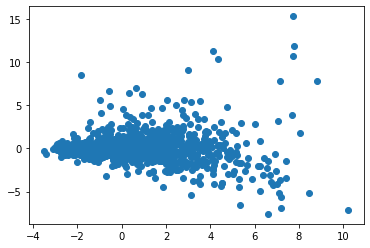

In [28]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1])
plt.show()

In [25]:
subreddit_tsne = TSNE(n_components=2)
subreddit_tsne_points = subreddit_tsne.fit_transform(subreddit_vecs)

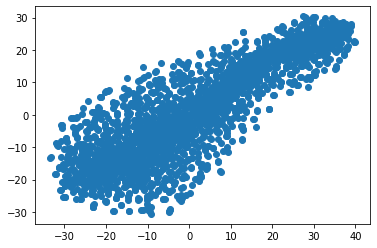

In [29]:
plt.scatter(subreddit_tsne_points[:,0], subreddit_tsne_points[:,1])
plt.show()

## What are the axes?

In [45]:
# first axis
subreddit_pca.components_[0]



array([ 0.07227452, -0.03952074, -0.29856923, -0.02204706, -0.16264173,
        0.05557895,  0.08217298, -0.01560188,  0.29358166, -0.02128979,
       -0.16531777,  0.23194642, -0.18023476, -0.005755  , -0.18584548,
        0.03489683,  0.04694149,  0.04897729, -0.05795461,  0.08288483,
       -0.08163513,  0.08415903,  0.25308716, -0.1667333 , -0.01708122,
        0.02785077,  0.17020434, -0.2396855 , -0.00190747, -0.24377564,
        0.0591756 , -0.06435186, -0.24606547,  0.08525338,  0.09355873,
       -0.17551975, -0.13874294, -0.18603091, -0.14600094, -0.04122201,
        0.15564805, -0.16065593,  0.02475648, -0.23056534,  0.01051249,
       -0.16844188,  0.07375175,  0.03577764, -0.11882272, -0.13649274],
      dtype=float32)

## K-means clustering

In [38]:
km2 = KMeans(n_clusters=2)
km2.fit(subreddit_vecs)
km2_labels = km2.labels_
color_vals = ['red', 'blue', 'green', 'orange', 'purple']
km2_label_colors = [color_vals[i] for i in km2_labels]

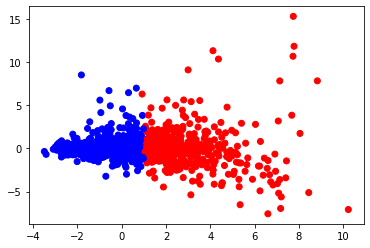

In [42]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1], c=km2_label_colors)
plt.show()

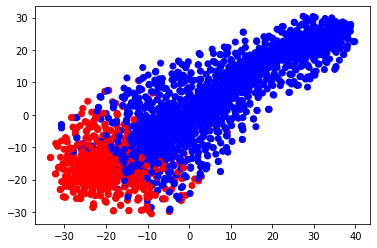

In [43]:
plt.scatter(subreddit_tsne_points[:,0], subreddit_tsne_points[:,1], c=km2_label_colors)
plt.show()

In [46]:
km3 = KMeans(n_clusters=3)
km3.fit(subreddit_vecs)
km3_label_colors = [color_vals[i] for i in km3.labels_]

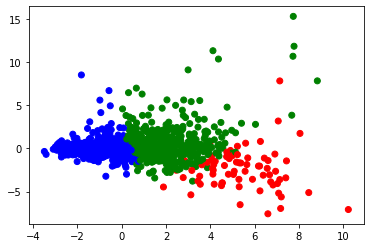

In [47]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1], c=km3_label_colors)
plt.show()

In [48]:
km4 = KMeans(n_clusters=4)
km4.fit(subreddit_vecs)
km4_label_colors = [color_vals[i] for i in km4.labels_]

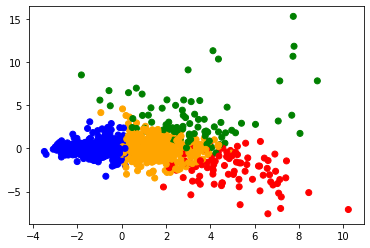

In [49]:
plt.scatter(subreddit_pca_points[:,0], subreddit_pca_points[:,1], c=km4_label_colors)
plt.show()